# Задача 1. Линейная регрессия, метод градиентного спуска
## Задача
- [x] Самостоятельно реализовать функцию **gradient_descent(X, y)**, которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал методом градиентного спуска (Batch Gradient Descent, GD) и возвращая вектор весов **w**. В качестве функционала можно выбрать, например, функцию ошибок **MSE** + $L_2$-регуляризатор. Использовать матрично-векторные операции для вычисления градиента.
- [x] В крайнем случае взять данные для предсказания стоимости машин [тут](https://github.com/rustam-azimov/ml-course/tree/main/data/car_price) (целевой признак для предсказания --- **price**).
- [x] Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).
- [x] Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.
- [x] Случайным образом разбить данные на обучающую и тестовую выборки, используя методы существующих библиотек.
- [x] При обучении моделей использовать масштабирование данных.
- [x] Обучить модель на обучающей выборке, используя функцию **gradient_descent(X, y)**. Оценить качество модели на обучающей и тестовой выборках, используя **MSE**, **RMSE** и $R^2$.
- [x] Обучить модель, используя существующую библиотеку. Например, в **sklearn** для $L_2$-регуляризатора можно использовать **Ridge**. Сравнить качество с вашей реализацией.
- [x] Повторить тоже самое, но используя кросс-валидацию.


In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# устанавливаем точность чисел с плавающей точкой
%precision %.4f

import warnings
warnings.filterwarnings('ignore')  # отключаем предупреждения

Самостоятельно реализовать функцию **gradient_descent(X, y)**, которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал методом градиентного спуска (Batch Gradient Descent, GD) и возвращая вектор весов **w**. В качестве функционала можно выбрать, например, функцию ошибок **MSE** + $L_2$-регуляризатор. Использовать матрично-векторные операции для вычисления градиента.

In [167]:
class Regressor:

    def __init__(self, learning_rate=0.01, epochs=100):

        self._coef = None
        self._intercept = None
        self.lr = learning_rate
        self.epochs = epochs

    def gradient_descent(self, X_train, y_train):
        self._intercept = 0
        self._coef = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            y_hat = np.dot(X_train, self._coef) + self._intercept
            intercept_der = -2 * np.mean(y_train - y_hat)
            self._intercept = self._intercept - (self.lr * intercept_der)

            coef_der = -2 * np.dot((y_train - y_hat),X_train) / X_train.shape[0]
            self._coef = self._coef - (self.lr * coef_der)

        print(self._intercept, self._coef)

    def predict(self, X_test):
        return np.dot(X_test, self._coef) + self._intercept

В крайнем случае взять данные для предсказания стоимости машин [тут](https://github.com/rustam-azimov/ml-course/tree/main/data/car_price) (целевой признак для предсказания --- **price**).
Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (Data Cleaning).

In [168]:
df = pd.read_csv('car_price.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


<AxesSubplot: >

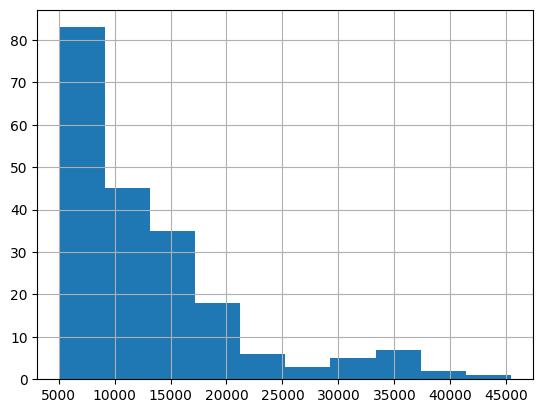

In [169]:
df["price"].hist()

Выполнить разведочный анализ (EDA), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.

In [170]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [171]:
print("Медиана цены: ", df['price'].mean())
print("Количество ценников: ", df['price'].count())

Медиана цены:  13276.710570731706
Количество ценников:  205


In [172]:
df['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

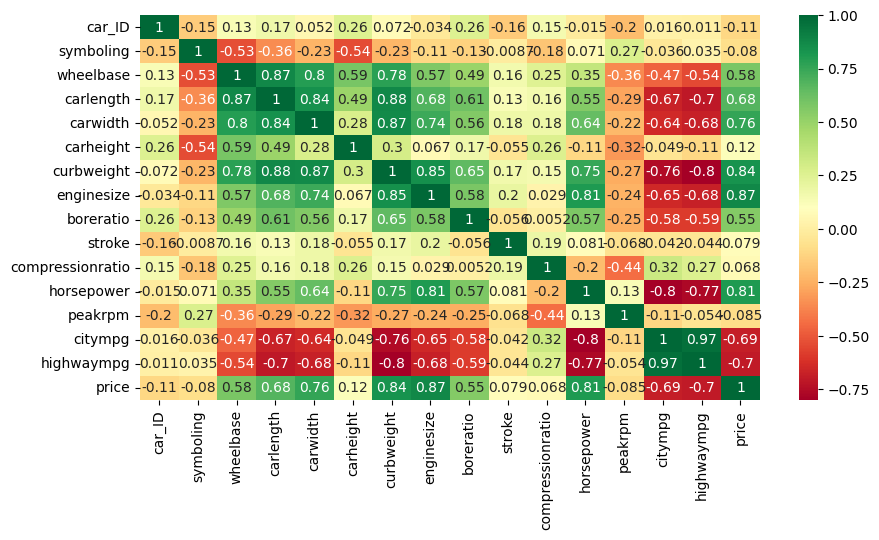

In [173]:
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.show()

Случайным образом разбить данные на обучающую и тестовую выборки, используя методы существующих библиотек.

In [174]:
from sklearn.model_selection import train_test_split

y = df["price"]
X = df.drop(columns=["price"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

numeric_data = X_train.select_dtypes([np.number])
numeric_mean = numeric_data.mean()
numeric_features = numeric_data.columns

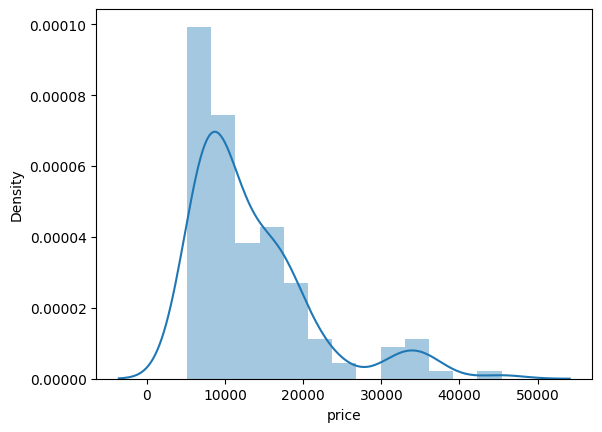

In [175]:
sns.distplot(y_train);

При обучении моделей использовать масштабирование данных.

In [176]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # воспользуемся стандартным трансформером

# масштабируем обучающую выборку и запоминаем среднее, стандартное отклонение признаков
X_train_scaled = scaler.fit_transform(X_train[numeric_features])

# масштабируем тестовую выборку используя статистики обучающей выборки
X_test_scaled = scaler.transform(X_test[numeric_features])

Обучить модель на обучающей выборке, используя функцию **gradient_descent(X, y)**. Оценить качество модели на обучающей и тестовой выборках, используя **MSE**, **RMSE** и $R^2$.

In [177]:
model = Regressor()
model.gradient_descent(X_train_scaled, y_train)
y_test_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_pred, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=False))

11630.273717583948 [-751.79766332  335.20947475  349.43073322  371.10306027 1201.30090072
 -204.69247404 1142.63009886 2190.88682835  231.74485491 -526.48895239
  621.58212589 1611.69564466  279.14700795 -554.70054602 -565.51114199]
Test RMSE = 4463.6614
Train RMSE = 3470.7560


In [178]:
model_sclearn = Ridge()
model_sclearn.fit(X_train_scaled, y_train)
y_test_pred2 = model_sclearn.predict(X_test_scaled)
y_train_pred2 = model_sclearn.predict(X_train_scaled)

print("Test RMSE = %.4f" % mean_squared_error(y_test, y_test_pred2, squared=False))
print("Train RMSE = %.4f" % mean_squared_error(y_train, y_train_pred2, squared=False))

Test RMSE = 3448.8313
Train RMSE = 2768.0513


Повторить тоже самое, но используя кросс-валидацию.

In [179]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model_sclearn, X_train[numeric_features], y_train, cv=5, scoring="neg_root_mean_squared_error")
print("Cross validation scores:\n\t", "\n\t".join("%.4f" % -x for x in cv_scores))
print("Mean CV MSE = %.4f" % np.mean(-cv_scores))

Cross validation scores:
	 2782.9368
	2717.8849
	3736.9268
	3295.0272
	3940.9990
Mean CV MSE = 3294.7549


Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, E --- мат. ожидание и STD --- стандартное отклонение. Сделать выводы.

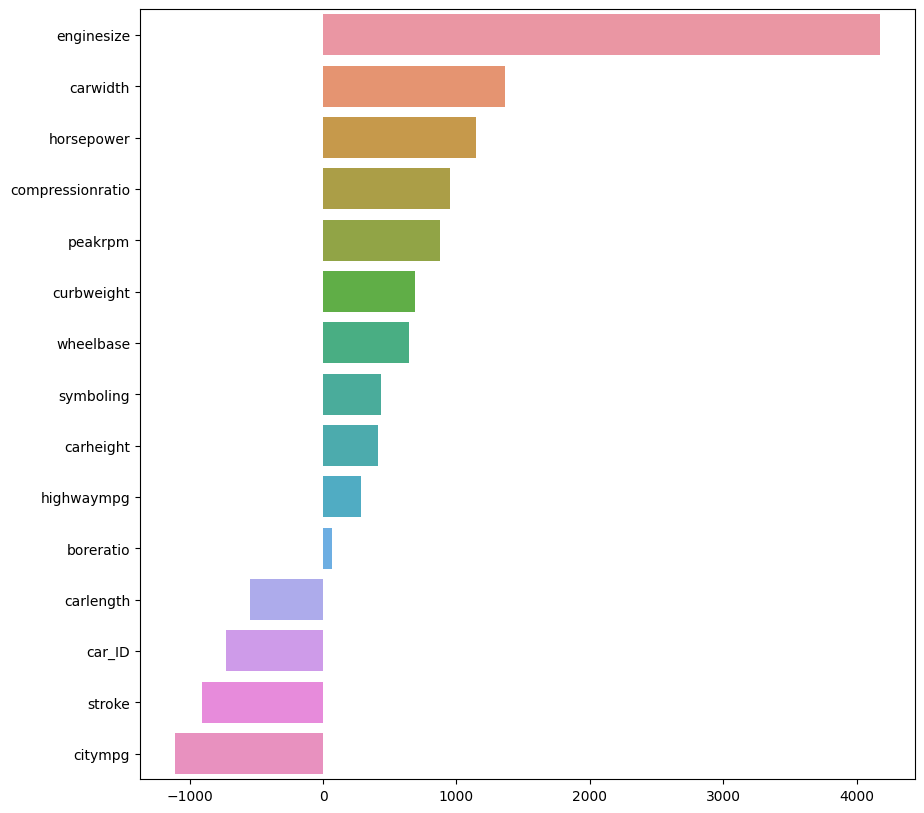

In [180]:
fig, ax = plt.subplots(figsize=(10, 10))

sorted_weights = sorted(zip(model_sclearn.coef_, numeric_features, X_train_scaled.std(axis=0)), reverse=True)
weights = [x[0] for x in sorted_weights]
features = [x[1] for x in sorted_weights]
sns.barplot(y=features, x=weights, ax=ax)
plt.show()

Во все ваши реализации добавить возможность настройки нужных гиперпараметров, а в процессе обучения **всех** моделей осуществить подбор оптимальных значений этих гиперпараметров.

Best alpha = 10.0000


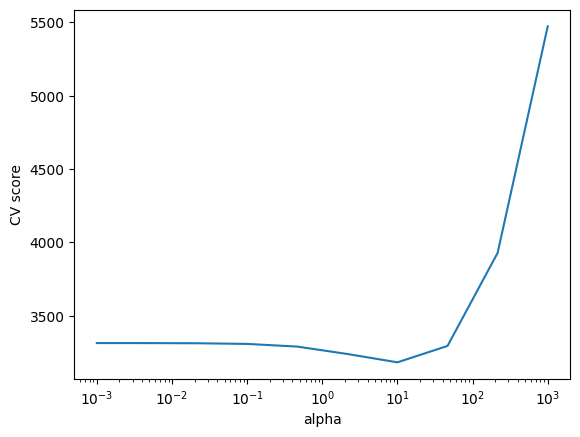

In [181]:
from sklearn.model_selection import GridSearchCV

alpha_grid = np.logspace(-3, 3, 10)
searcher = GridSearchCV(Ridge(), [{"alpha": alpha_grid}], scoring="neg_root_mean_squared_error", cv=5)
searcher.fit(X_train_scaled, y_train)

plt.plot(alpha_grid, -searcher.cv_results_["mean_test_score"])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV score")

best_alpha = searcher.best_params_["alpha"]
print("Best alpha = %.4f" % best_alpha)
plt.show()

In [182]:
from sklearn.pipeline import Pipeline

simple_pipeline = Pipeline([
    ('scaling', StandardScaler()),
    ('regression', Ridge(best_alpha))
])

model = simple_pipeline.fit(X_train[numeric_features], y_train)
y_pred = model.predict(X_test[numeric_features])
print("Test RMSE =", mean_squared_error(y_test, y_pred, squared=False))

Test RMSE = 3562.4706217211115
